# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.630461e+01     1.424839e+01
 * time: 0.0017428398132324219
     1     3.531308e+01     1.283663e+01
 * time: 0.005669832229614258
     2     2.533782e+01     2.824427e+00
 * time: 0.012086868286132812
     3     2.189760e+01     3.362590e+00
 * time: 0.0174100399017334
     4     2.060078e+01     3.199944e+00
 * time: 0.021890878677368164
     5     1.985300e+01     3.226344e+00
 * time: 0.06397294998168945
     6     1.887713e+01     1.947488e+00
 * time: 0.06925797462463379
     7     1.860891e+01     2.145850e+00
 * time: 0.07323288917541504
     8     1.834426e+01     2.417043e+00
 * time: 0.07719182968139648
     9     1.792292e+01     1.463589e+00
 * time: 0.08113288879394531
    10     1.760690e+01     9.987271e-01
 * time: 0.08563995361328125
    11     1.735908e+01     8.002122e-01
 * time: 0.09052085876464844
    12     1.726080e+01     6.666043e-01
 * time: 0.09523892402648926
    13     1.723308e+01     1.323236e+00
 * t

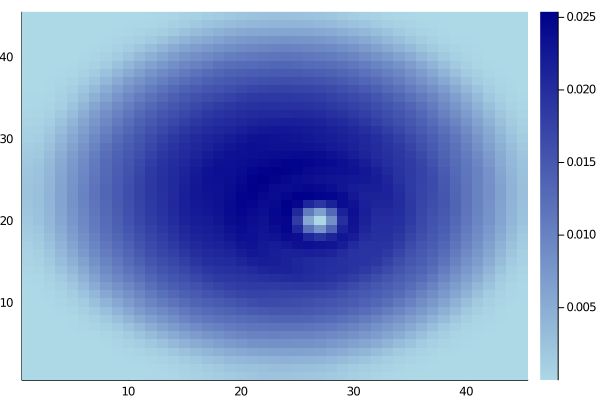

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)